In [1]:
from matplotlib import pyplot as plt

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)

# Define period length:
period_length = 4200 # mm

# Define file with solenoid current values:
file = 'g4bl-input/sol_place7_31.txt'

In [2]:
# Read in data from file:

with open(file, 'r') as f:
        lines = f.readlines()
        
        current_vals = []; abs_current_vals = []
        z_vals = []
        for i in range(len(lines)):
            if i > 10 and i < 210:
                start_ind = lines[i].find("current=") + len("current=")
                stop_ind = lines[i].find(" rotation=") - 1
                current = lines[i][start_ind:stop_ind]
                if current != '':
                    current_vals.append(float(current))
                    abs_current_vals.append(abs(float(current)))

                start_ind_z = lines[i].find("z=") + len("z=")
                stop_ind_z = lines[i].find("+$period*") - 1
                start_ind_pnum = lines[i].find("+$period*") + len("+$period*") 
                stop_ind_pnum = lines[i].find(" current") 
                z = lines[i][start_ind_z:stop_ind_z]
                pnum = lines[i][start_ind_pnum:stop_ind_pnum]
                if z != '' and pnum != '':
                    z_vals.append((float(z)+float(pnum)*period_length)/1000)

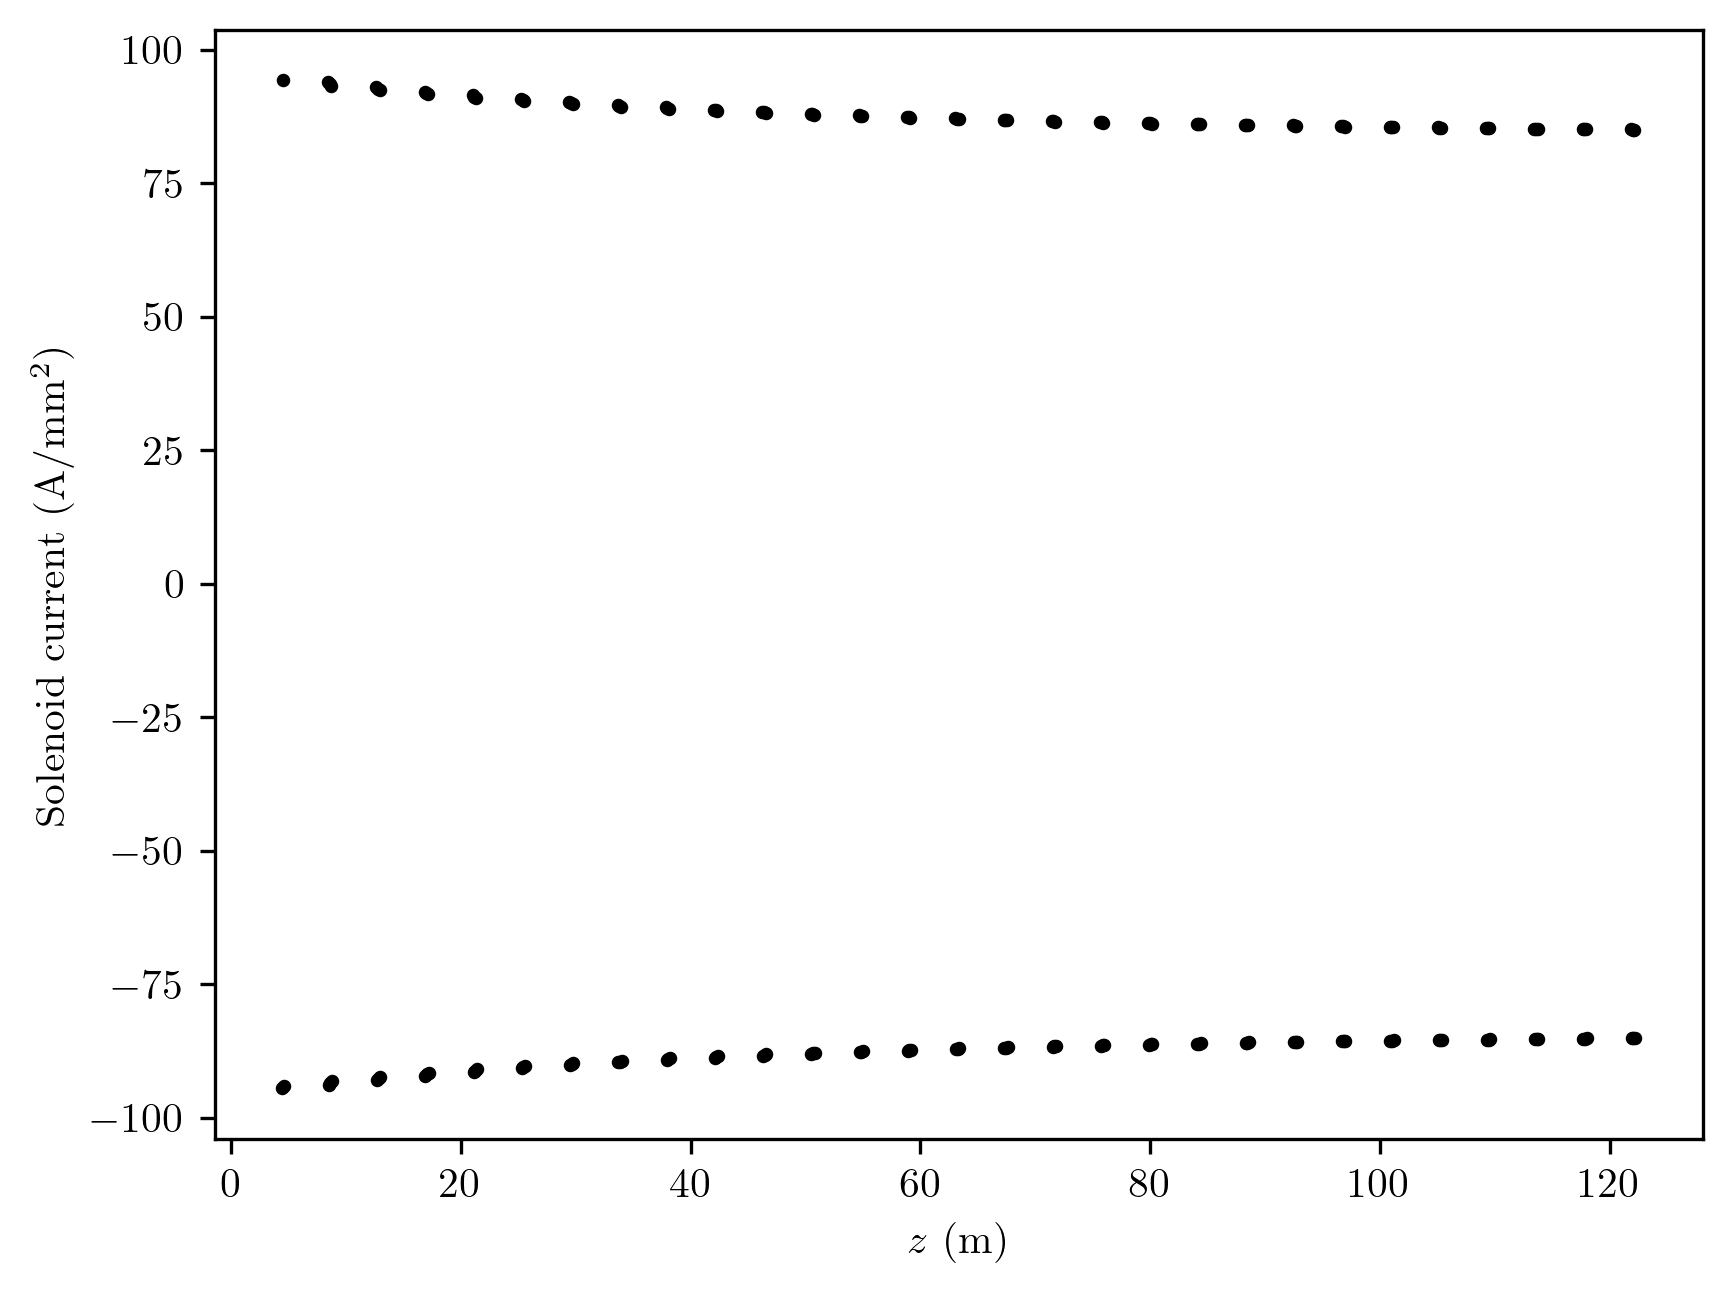

In [3]:
# Plot solenoid current vs. z:
plt.scatter(z_vals,current_vals,s=5,color='black')
plt.ylabel('Solenoid current (A/mm$^2$)')
plt.xlabel('$z$ (m)')
plt.show()

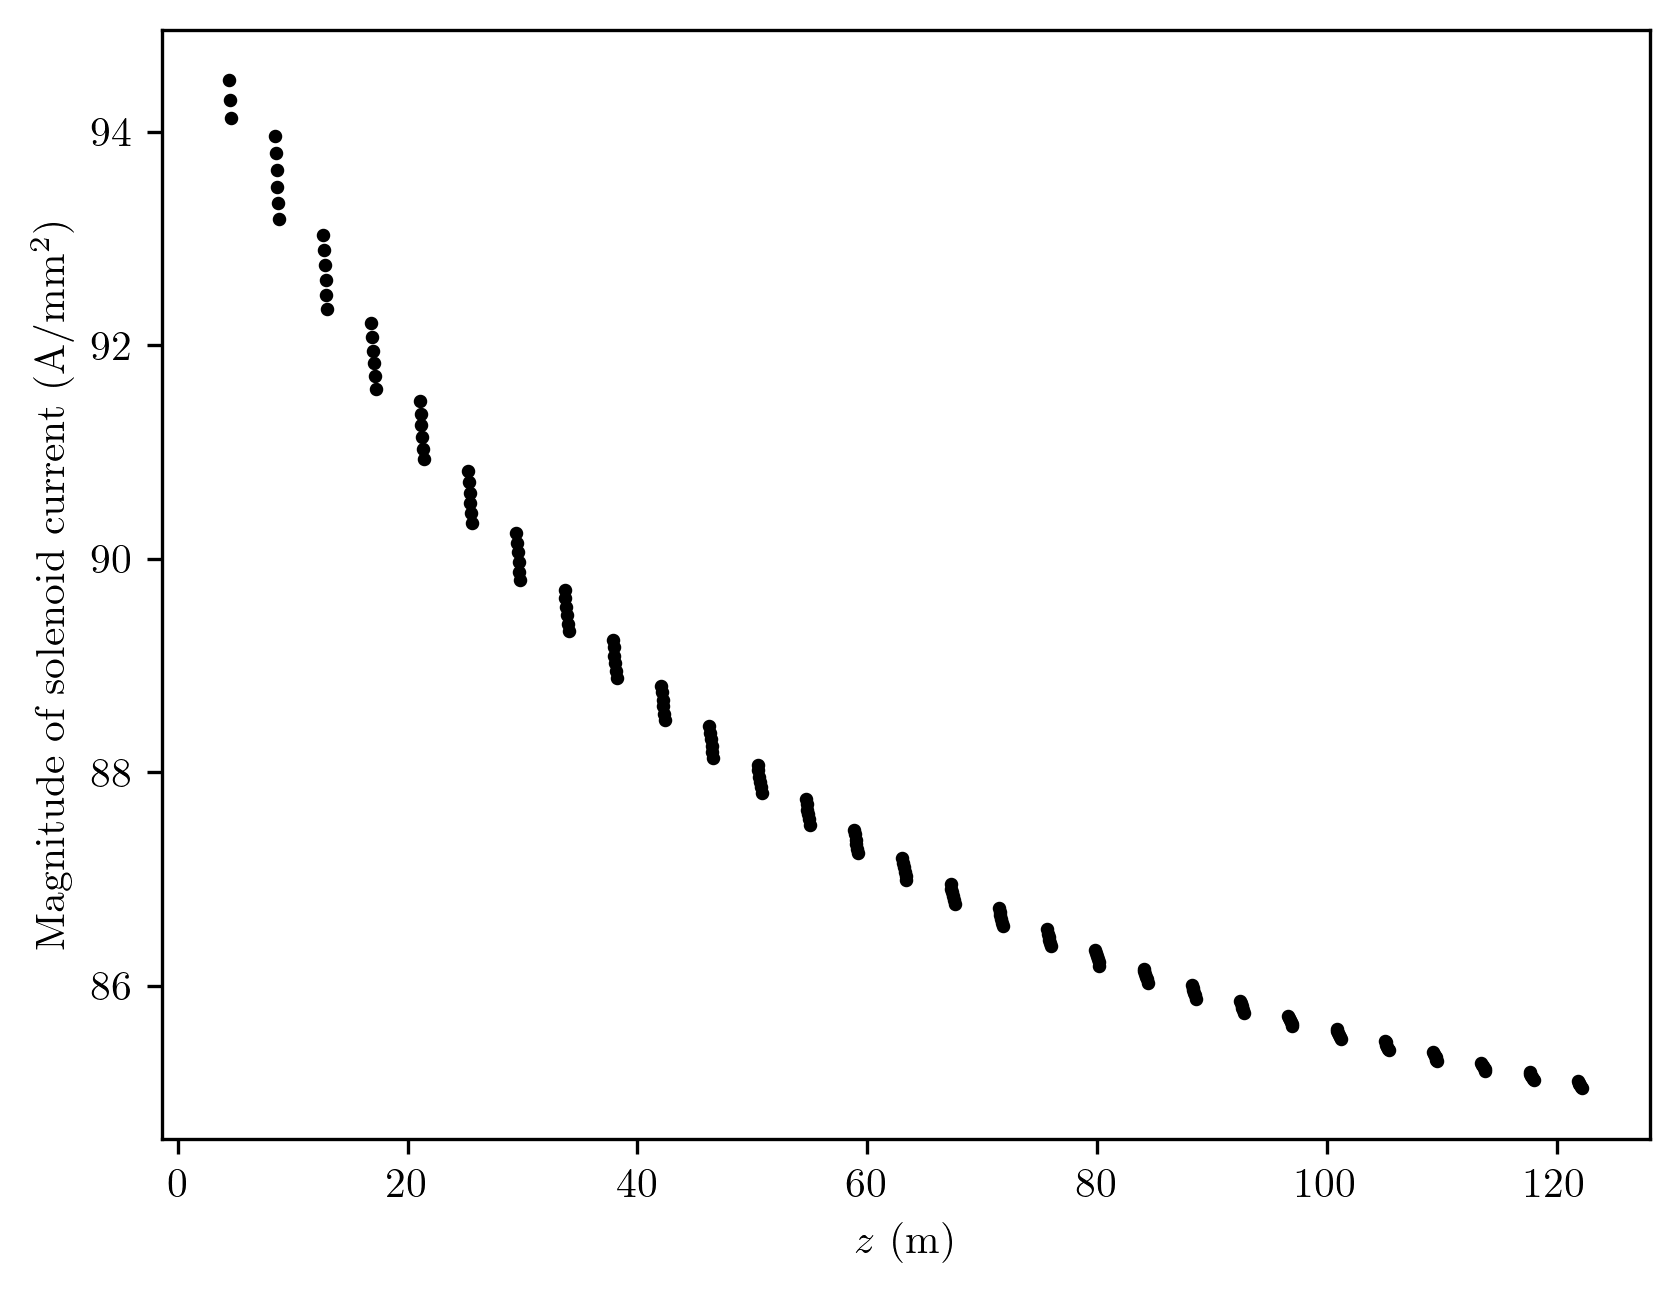

In [4]:
# Plot magnitude of solenoid current vs. z:
plt.scatter(z_vals,abs_current_vals,s=5,color='black')
plt.ylabel('Magnitude of solenoid current (A/mm$^2$)')
plt.xlabel('$z$ (m)')
plt.show()